# Análisis de datos en salud

## Unidad 7: Análisis de grafos

**Índice**   
1. [Introducción a los grafos](#id1)
2. [Modelado de datos de salud con grafos](#id2)
3. [Algoritmos de grafos aplicados a salud ](#id3)
4. [Knowledge graphs](#id4)


In [1]:
# Montamos la unidad Drive para acceder a los archivos de Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Especificamos la ruta hasta la carpeta donde tenemos los archivos de la Unidad 7
%cd /content/drive/MyDrive/Colab_Notebooks/Analisis_datos_salud/Unidad7

Mounted at /content/drive
/content/drive/MyDrive/Colab_Notebooks/Analisis_datos_salud/Unidad7


### 1. Introducción a los grafos <a name="id1"></a>

La **teoría de grafos** estudia las relaciones entre objetos mediante unas estructuras llamadas **grafos**.

Un grafo `G` se define como un par ordenado:

G=(V, E)

donde:
- V (Vértices o Nodos): Representan las entidades u objetos.
- E (Aristas o Enlaces): Representan las conexiones entre los nodos.


*Ejemplo*: En un grafo de pacientes y doctores, los nodos pueden ser personas y las aristas pueden representar consultas médicas.

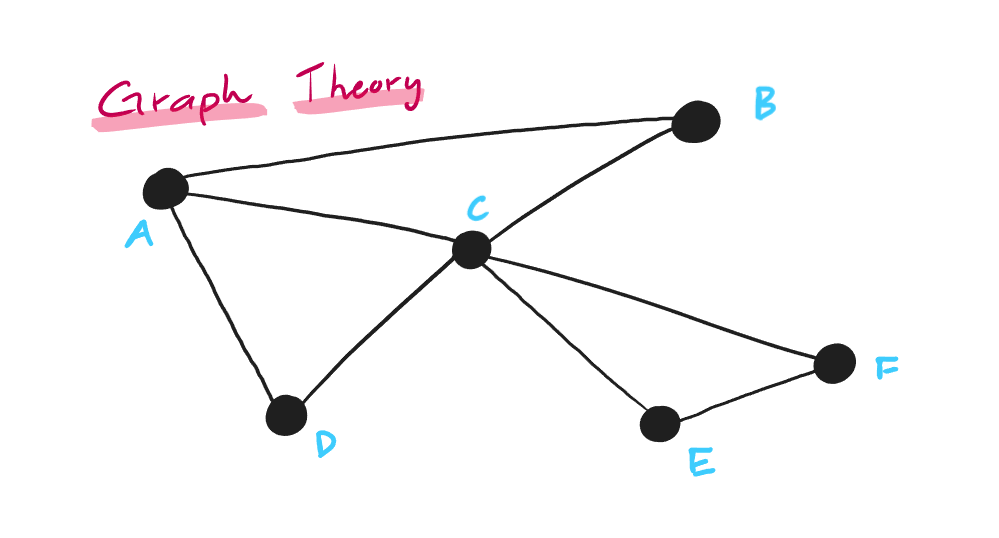

In [2]:
from IPython import display
display.Image("img/graph-theory.png", width=700)

#### 1.2 Tipos de Grafos


Los grafos pueden clasificarse de diferentes maneras según su estructura, propiedades y relaciones entre los nodos y aristas.

**Según la dirección de las aristas**

- Grafo No Dirigido: las aristas no tienen dirección, es decir, si hay una conexión entre A y B, se puede ir en ambos sentidos.
- Grafo Dirigido: las aristas tienen dirección, lo que significa que A --> B es distinto que B --> A.

**Según el peso de las aristas**

- Grafo ponderado: las aristas tienen pesos, que pueden representar distancia, costo, frecuencia, etc.
- Grafo no ponderado: todas las aristas tienen el mismo peso.

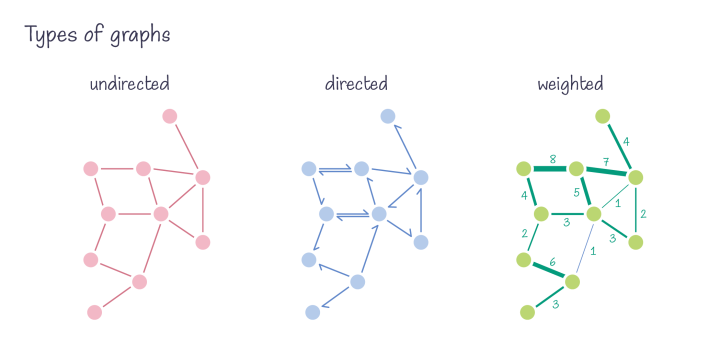

In [3]:
display.Image("img/types_graph.jpg", width=700)

#### 1.3 Representación de un grafo

Un grafo puede representarse de varias maneras dependiendo de su estructura y uso. Las formas más comunes de representación son **la matriz de adyacencia**, **la lista de adyacencia** y **la lista de aristas**.


**Matriz de adyacencia**

Consiste en una matriz n x n donde:  
- \( A[i][j] = 1 \) si hay una arista entre el nodo \( i \) y el nodo \( j \).  
- \( A[i][j] = 0 \) si no hay conexión.  
- En un **grafo ponderado**, en lugar de 1 y 0, se coloca el peso de la arista.  

**Ejemplo:**  
Para el siguiente grafo:   \[A - B - C \]  
La matriz sería:  

\begin{bmatrix}
0 & 1 & 0 \\
1 & 0 & 1 \\
0 & 1 & 0
\end{bmatrix}

La matriz de adyacencia permite una representación sencilla del grafo con un acceso fácil a la información. Sin embargo, no es muy eficiente cuando los grafos tienen muchas conexiones faltantes (grafos dispersos).


In [4]:
# Cargamos la librería numpy
import numpy as np

# Creamos una matriz de adyacencia
matriz_adyacencia = np.array([
    [0, 1, 0],
    [1, 0, 1],
    [0, 1, 0]
])

# Mostramos la matriz
print(matriz_adyacencia)

[[0 1 0]
 [1 0 1]
 [0 1 0]]


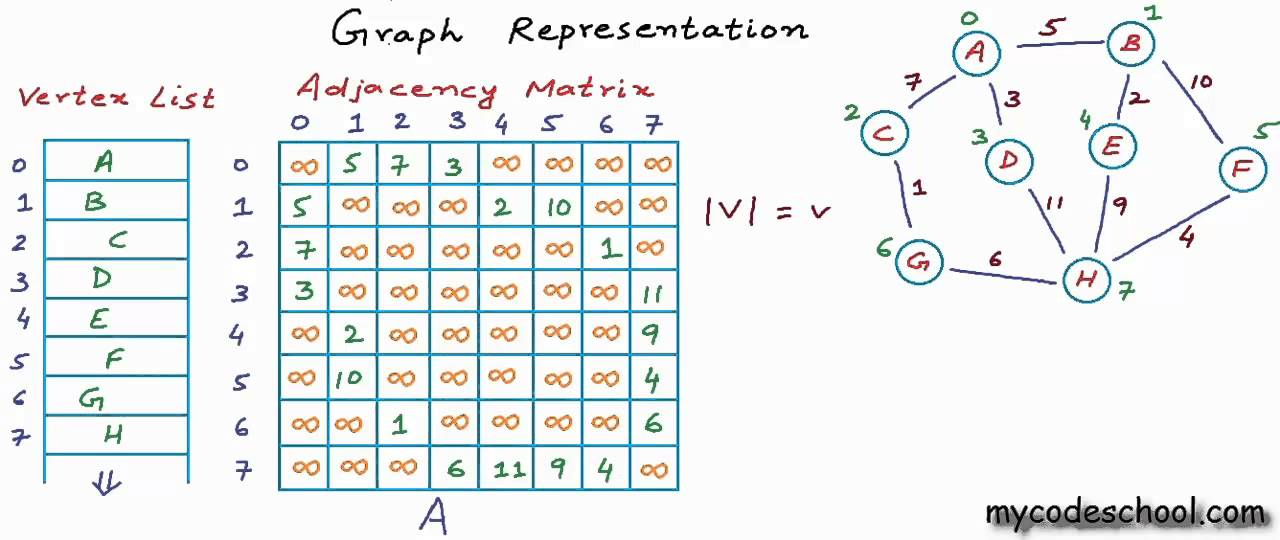

In [5]:
display.Image("img/adj_matrix.jpg", width=700)

**Lista de adyacencia**

Cada nodo tiene una lista de los nodos a los que está conectado.
Esta representación es más eficiente a nivel de memoria cuando hay grafos dispersos, pero hace más lento el acceso a una conexión específica.

In [6]:
# Representamos el gráfico como un diccionario
grafo = {
    "A": ["B"],
    "B": ["A", "C"],
    "C": ["B"]
}

# Mostramos la información del nodo B
print(grafo["B"])

['A', 'C']


**Lista de aristas**

Se almacena una lista de pares (u, v), donde cada par representa una arista entre los nodos u y v. Esta representación es útil cuando solo se necesitan las listas de conexiones, pero es poco eficiente cuando se quiere acceder a los nodos.

In [7]:
# Creamos la lista de aristas
aristas = [("A", "B"), ("B", "C")]

**Librería NetworkX**

`NetworkX` es una librería de Python utilizada para la creación, manipulación y análisis de grafos y redes complejas.


In [8]:
# Cargamos la librería NetworkX
import networkx as nx

# Creamos un grafo no dirigido
G = nx.Graph()

# Añadimos nodos
G.add_nodes_from(["Doctor1", "Doctor2", "Paciente1", "Paciente2", "Paciente3"])

# Añadimos las aristas
G.add_edges_from([("Doctor1", "Doctor2"), ("Doctor1", "Paciente1"), ("Doctor2", "Paciente2"), ("Doctor1", "Paciente3"),])

# Mostramos nodos y aristas
print("Nodos:", G.nodes)
print("Aristas:", G.edges)

Nodos: ['Doctor1', 'Doctor2', 'Paciente1', 'Paciente2', 'Paciente3']
Aristas: [('Doctor1', 'Doctor2'), ('Doctor1', 'Paciente1'), ('Doctor1', 'Paciente3'), ('Doctor2', 'Paciente2')]


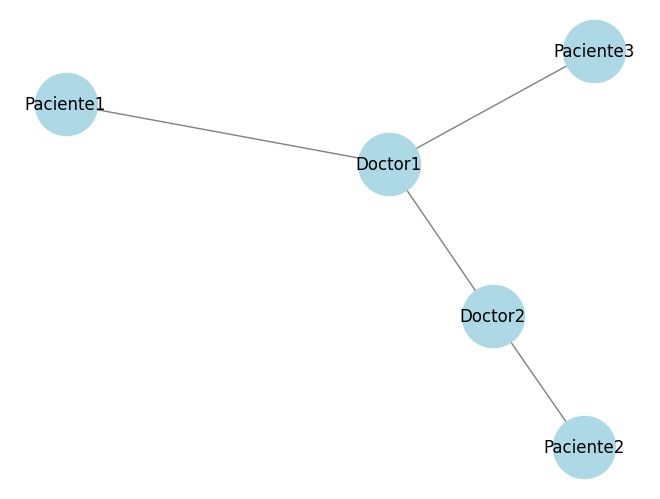

In [9]:
# Cargamos la librería de visualización
import matplotlib.pyplot as plt

# Mostramos graficamente el grafo
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2000, font_size=12)
plt.show()

#### 1.4 Propiedades de los grafos

Los grafos tienen diversas propiedades que ayudan a entender su estructura y comportamiento. Estas propiedades son clave en aplicaciones como análisis de redes sociales, propagación de enfermedades y modelado de datos médicos.




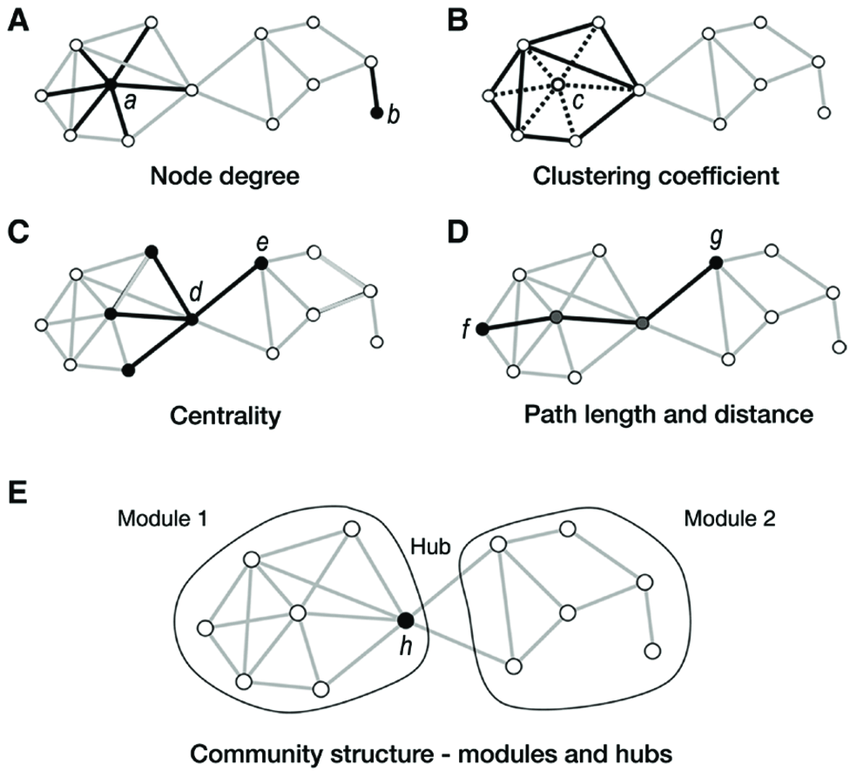

In [10]:
display.Image("img/graph_properties.png", width=500)

**Grado de un nodo**

El **grado** de un nodo es el número de aristas que lo conectan.  

- **Grado en un grafo no dirigido:** Número total de conexiones del nodo.  
- **Grado en un grafo dirigido:**  
  - **Grado de entrada**: Número de aristas que llegan al nodo.  
  - **Grado de salida**: Número de aristas que salen del nodo.  

In [11]:
# Cargamos la librería estándard para grafos en python
import networkx as nx

# Creamos un grafo no dirigido
G = nx.Graph()

# Añadimos nodos
G.add_nodes_from(["Doctor1", "Doctor2", "Paciente1", "Paciente2", "Paciente3"])

# Añadimos las aristas
G.add_edges_from([("Doctor1", "Doctor2"), ("Doctor1", "Paciente1"),
 ("Doctor2", "Paciente2"), ("Doctor1", "Paciente3"),])

# Mostramos el grado de Doctor1
print(G.degree("Doctor1"))

3


In [12]:
# Creamos un grafo dirigido
G2 = nx.DiGraph()

# Añadimos nodos
G.add_nodes_from(["Doctor1", "Doctor2", "Paciente1", "Paciente2", "Paciente3"])

# Añadimos las aristas (la dirección ahora importa)
G2.add_edges_from([("Doctor1", "Doctor2"), ("Doctor1", "Paciente1"),
 ("Paciente2", "Doctor2"), ("Doctor1", "Paciente3"),])

# Mostramos el grado de entrada de Doctor2
print(G2.in_degree("Doctor2"))

# Mostramos el grado de salida de Doctor1
print(G2.out_degree("Doctor1"))

2
3


**Camino y Distancia**  
- **Camino**: Secuencia de nodos conectados por aristas.  
- **Longitud del camino**: Número de aristas en el camino.  
- **Distancia entre dos nodos u y v**: Longitud del camino más corto entre u y v.

Por ejemplo, se puede usar para encontrar la distancia mínima entre un paciente y un especialista en un sistema de referencia.  

In [13]:
# Calculamos el camino más corto entre el doctor 2 y el paciente 3
print(nx.shortest_path(G, source="Doctor2", target="Paciente3"))

['Doctor2', 'Doctor1', 'Paciente3']


**Centralidad**  
Mide la importancia de un nodo en un grafo.  

- **Centralidad de grado**: Cuántos nodos están conectados a un nodo.  
- **Centralidad de cercanía**: Qué tan cerca está un nodo de todos los demás.  
- **Centralidad de intermediación (Betweenness)**: Cuántos caminos más cortos pasan por un nodo.  

Permite identificar hospitales clave en un sistema de referencia.  

In [14]:
# Centralidad de grado
degree_centrality = nx.degree_centrality(G)

# Centralidad de cercanía
closeness_centrality = nx.closeness_centrality(G)

# Centralidad de intermediación
betweenness_centrality = nx.betweenness_centrality(G)

# Mostramos resultados
print("Centralidad de grado:", degree_centrality)
print("Centralidad de cercanía:", closeness_centrality)
print("Centralidad de intermediación:", betweenness_centrality)

Centralidad de grado: {'Doctor1': 0.75, 'Doctor2': 0.5, 'Paciente1': 0.25, 'Paciente2': 0.25, 'Paciente3': 0.25}
Centralidad de cercanía: {'Doctor1': 0.8, 'Doctor2': 0.6666666666666666, 'Paciente1': 0.5, 'Paciente2': 0.4444444444444444, 'Paciente3': 0.5}
Centralidad de intermediación: {'Doctor1': 0.8333333333333333, 'Doctor2': 0.5, 'Paciente1': 0.0, 'Paciente2': 0.0, 'Paciente3': 0.0}


**Densidad de un Grafo**  

Mide cuán conectado está en relación con el número máximo posible de conexiones. Se calcula con la siguiente fórmula:


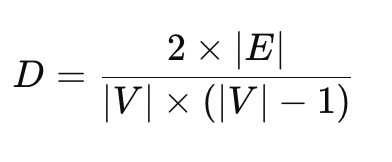

In [15]:
display.Image("img/graph_density.png", width=200)

Donde:  
- \( |E| \) es el número de aristas.  
- \( |V| \) es el número de nodos.  
- \( (|V| * (|V| - 1)) / 2 \) es el número máximo posible de aristas en un grafo no dirigido.  


- **Denso** → Muchas conexiones entre nodos (aprox. 1).  
- **Disperso** → Pocas conexiones entre nodos (aprox.0).  

Se pueden detectar redes de transmisión de enfermedades, ya que una alta densidad implica propagación rápida.  

In [16]:
# Calculamos la densidad
densidad = nx.density(G)
print(f"Densidad del grafo D: {densidad:.2f}")

Densidad del grafo D: 0.40


<Figure size 600x400 with 0 Axes>

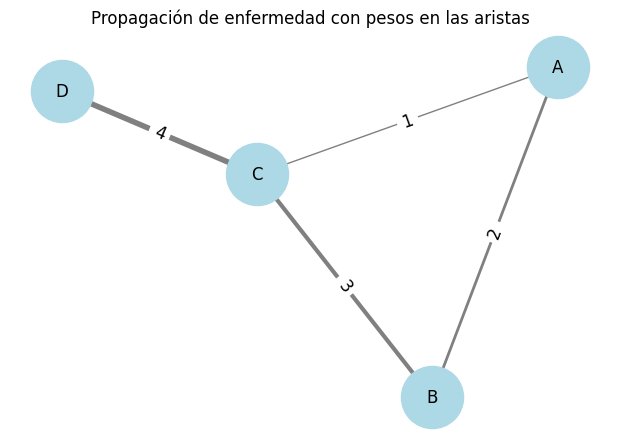

In [17]:
## Ejemplo de simulación de propagación de una enfermedad

import networkx as nx
import matplotlib.pyplot as plt

# Creamos un grafo no dirigido
G = nx.Graph()

# Agregamos nodos
G.add_nodes_from(["A", "B", "C", "D"])

# Agregamos aristas con pesos
# El peso se refiere a la interacción entre los nodos
# Peso alto --> más interacción --> mayor probabilidad de propagación
G.add_weighted_edges_from(
    [("A", "B", 2), ("B", "C", 3),
    ("A", "C", 1), ("C", "D", 4)])

# Dibujamos el grafo
pos = nx.spring_layout(G)  # Posiciones de los nodos
plt.figure(figsize=(6, 4))

# Obtenemos los pesos de las aristas
weights = nx.get_edge_attributes(G, "weight")

# Dibujamos el grafo con grosor basado en los pesos
plt.figure(figsize=(6, 4))
nx.draw(G, pos, with_labels=True, node_color="lightblue",
        edge_color="gray", node_size=2000, font_size=12,
        width=[weights[e] for e in G.edges()]) # Ajustamos el grosor de las aristas

# Añadimos etiquetas de los pesos en las aristas
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights, font_size=12)

plt.title("Propagación de enfermedad con pesos en las aristas")
plt.show()

### 2. Modelado de datos de salud con grafos <a name="id2"></a>

El modelado de datos de salud con grafos puede ofrecer una representación más estructurada y eficiente de relaciones complejas en sistemas de salud. Usando grafos, se pueden modelar redes de interacción entre pacientes, médicos, hospitales, tratamientos, y enfermedades, entre otros. Los grafos permiten visualizar conexiones y patrones que de otra manera podrían ser más difíciles de identificar en bases de datos tradicionales.

Algunos tipos de grafos en el contexto de datos biomédicos frecuentes:


1. Redes de Pacientes y Médicos
- Nodos: Pacientes, médicos, hospitales.
- Aristas: Relaciones de referencia médica, consultas, tratamientos recomendados.

Aplicaciones:

- Identificar patrones de referencia médica y encontrar médicos más conectados o especialidades más consultadas.
- Modelar las rutas de atención en hospitales o redes de emergencia, identificando la distribución de recursos (ambulancias, personal médico) más eficiente.

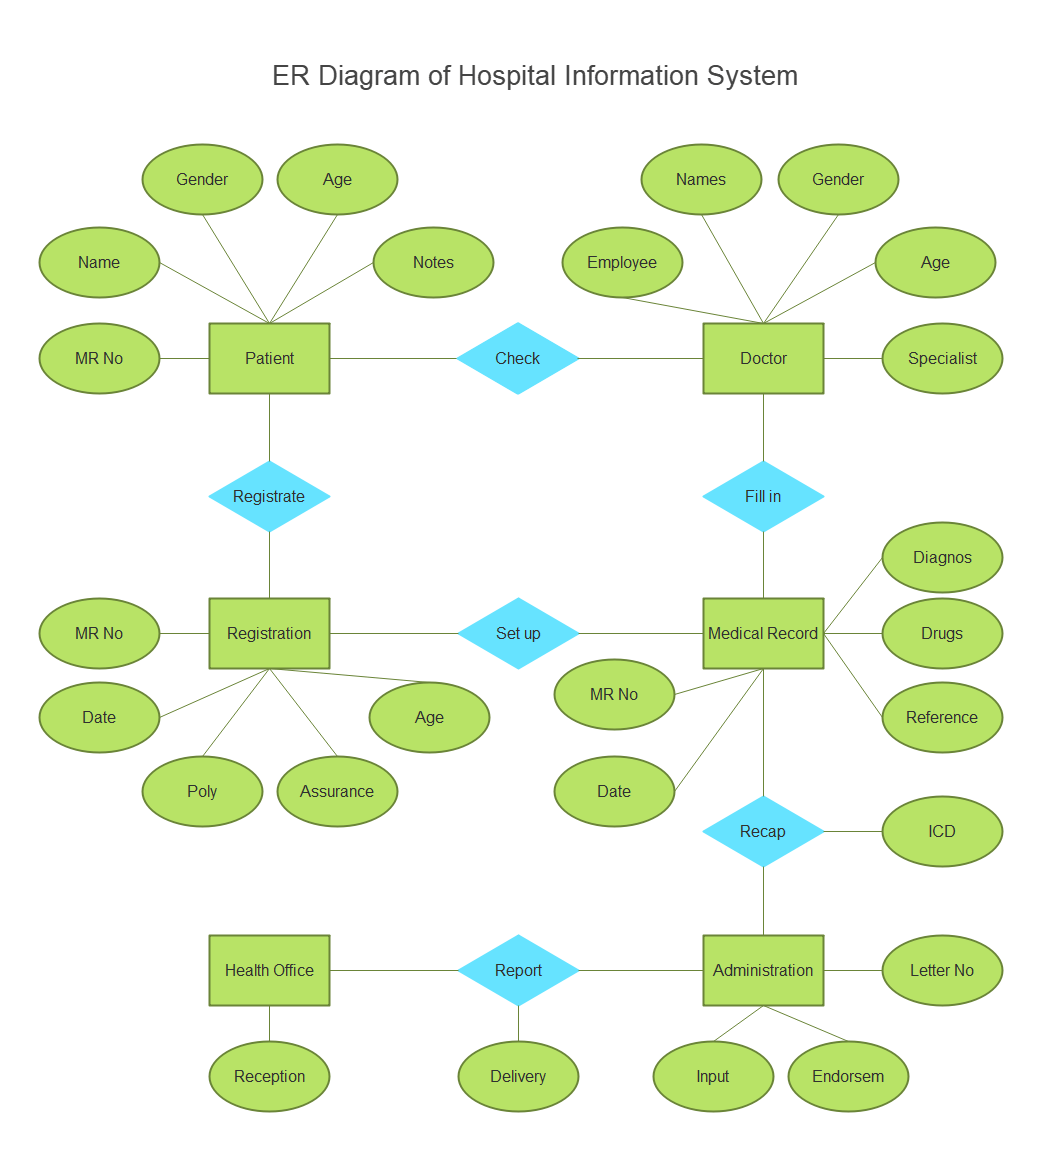

In [18]:
display.Image("img/grafo_pacientes_medicos.png", width=700)

2. Propagación de enfermedades (Modelos epidemiológicos)
- Nodos: Individuos o grupos de individuos.
- Aristas: Relaciones de contacto (transmisión de enfermedades).

Aplicaciones:
- Analizar la propagación de enfermedades entre poblaciones o dentro de hospitales, considerando factores como frecuencia de contacto (peso de la arista) y probabilidad de transmisión.
- Simular la propagación de enfermedades infecciosas como la gripe o COVID-19 en una población, dependiendo de cómo las personas se conectan entre sí (frecuencia de contacto).

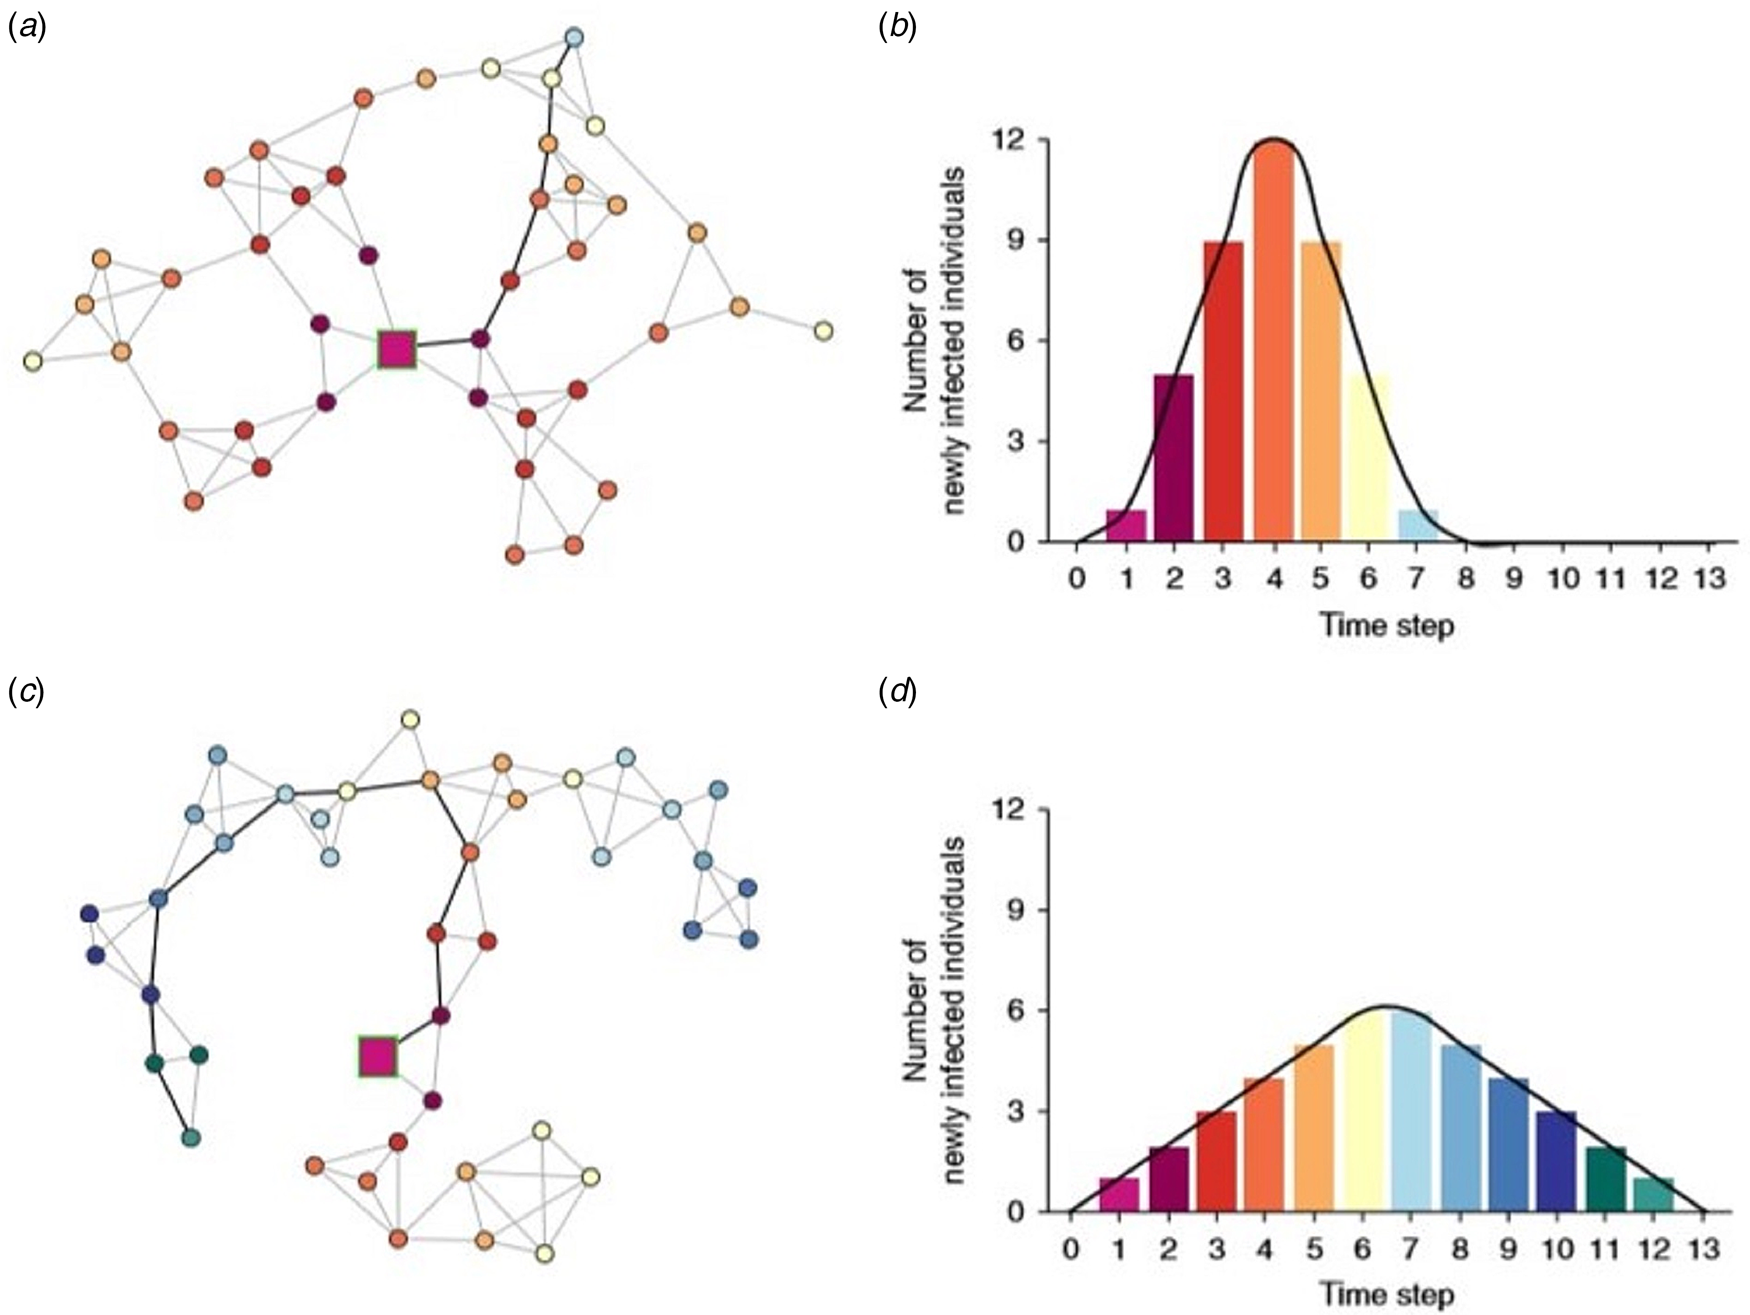

In [19]:
display.Image("img/covid_disease_spread_graph.png", width=700)

In [20]:
# Cargamos la librería random para generar probabilidades aleatorias
import random

# Simulación simple: Infección basada en conexiones

# Paciente inicial
infectados = {"C"}

# Simulación de 3 pasos, ajustando la probabilidad con el peso
for _ in range(3):
  nuevos = set()
  for nodo in infectados:
    for vecino in G.neighbors(nodo):
      peso = G[nodo][vecino]["weight"]
      # Probabilidad de contagio basada en el peso
      if random.random() > (1 / peso):
        nuevos.add(vecino)
  infectados.update(nuevos)
  print("Infectados:", infectados)

Infectados: {'D', 'C', 'B'}
Infectados: {'A', 'B', 'D', 'C'}
Infectados: {'A', 'B', 'D', 'C'}


In [21]:
!pip install EoN

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for EoN: filename=EoN-1.2-py3-none-any.whl size=122468 sha256=e7da7ec8f9e561000d5a3d5cb7408c8ba274446e4b29449409db6c74e595d415
  Stored in directory: /root/.cache/pip/wheels/10/ec/88/6daefcc5ebdf7e373db9da6a61386f33143571d885c4c7708a
Successfully built EoN


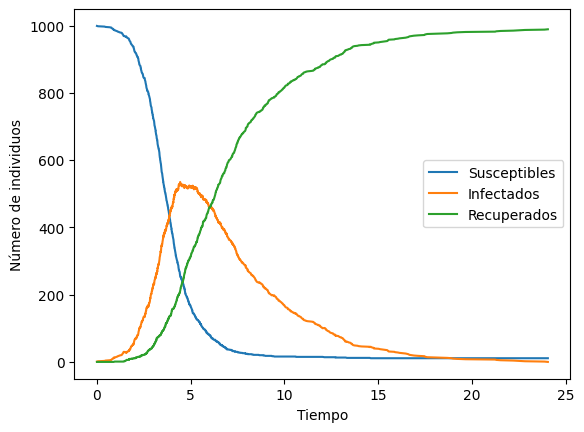

In [22]:
import EoN as eon
import networkx as nx
import matplotlib.pyplot as plt
import random

# Simulamos la propagación de una enfermedad en el grafo utilizando un modelo SIR

# Creamos una red aleatoria usando Erdos-Renyi
N = 1000  # Número de nodos
G = nx.erdos_renyi_graph(N, 0.01)  # 1000 nodos, probabilidad de conexión 0.01

# Definimos los parámetros del modelo SIR
tau = 0.2   # Tasa de infección
gamma = 0.3  # Tasa de recuperación

# Calculamos la simulación SIR con vacunación
t, S, I, R = eon.fast_SIR(G, tau=tau, gamma=gamma, initial_infecteds={0})

# Mostramos los resultados
plt.plot(t, S, label="Susceptibles")
plt.plot(t, I, label="Infectados")
plt.plot(t, R, label="Recuperados")
plt.xlabel("Tiempo")
plt.ylabel("Número de individuos")
plt.legend()
plt.show()


3. Tratamientos y medicamentos
- Nodos: Tratamientos, medicamentos, diagnósticos.
- Aristas: Relaciones de tratamiento-prescripción, tratamiento-enfermedad.

Aplicaciones:
- Detectar patrones en la red de enfermedades relacionadas, identificando posibles comorbilidades o tratamientos más eficaces para combinaciones específicas de condiciones.
- Ayudar a los médicos a determinar la mejor secuencia de tratamientos para un paciente en función de su diagnóstico y respuesta previa a tratamientos anteriores.


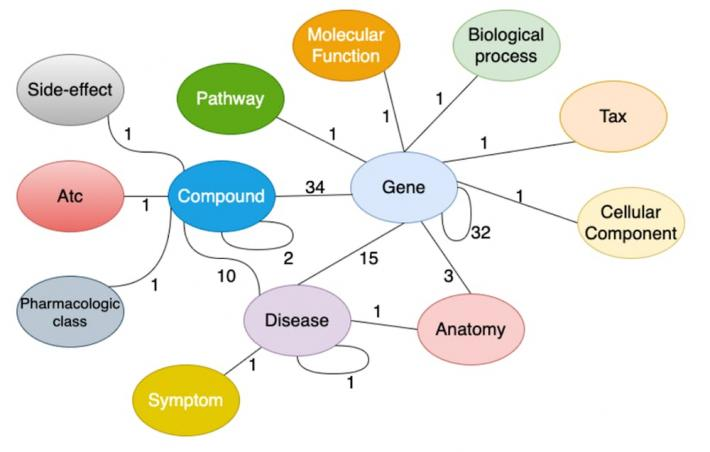

In [23]:
display.Image("img/drug_repurpose_graph.jpg",  width=700)

4. Redes de genes o proteínas
- Nodos: Genes, proteínas, células.
- Aristas: Interacciones entre proteínas, rutas metabólicas.

Aplicaciones:
- Identificar proteínas clave que juegan un papel importante en una enfermedad, como proteínas mutadas en cáncer.
- Encontrar vías metabólicas alteradas en enfermedades como el cáncer o diabetes.
- Identificar proteínas que actúan como dianas terapéuticas para tratar enfermedades relacionadas con la disfunción genética.


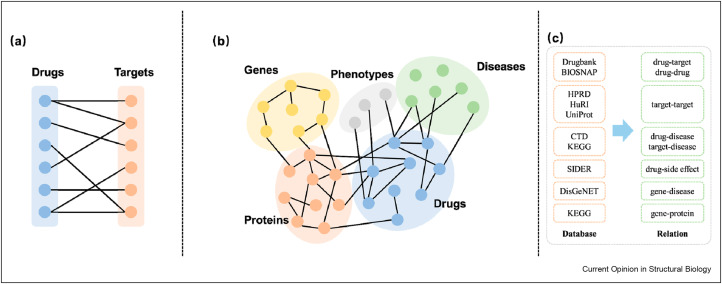

In [24]:
display.Image("img/drug_target_graph.jpg",  width=700)

### 3. Algoritmos de grafos aplicados a salud <a name="id3"></a>

#### 3.1 Algoritmos de búsqueda: DFS y BFS

Estos algoritmos permiten explorar grafos de manera sistemática. Pueden usarse para explorar redes de interacciones o rutas metabólicas de manera eficiente.

- DFS (Depth-First Search): explora un camino completamente antes de retroceder y probar otro.
- BFS (Breadth-First Search): BFS explora todos los vecinos de un nodo antes de pasar a los vecinos de esos vecinos.

Aplicación:
- Detección de rutas metabólicas: Encontrar todas las posibles rutas desde un metabolito inicial hasta un producto final en redes metabólicas.
- Redes de co-expresión génica: Identificar genes que están relacionados o coexpresados en un patrón determinado (enfermedad, efectos secundarios, etc).


In [25]:
# Creamos un grafo simple
G = nx.Graph()
G.add_edges_from([("Gen A", "Gen B"), ("Gen A", "Gen C"),
                 ("Gen B", "Gen D"), ("Gen C", "Gen D")])

# Buscamos con DFS desde 'Gen A'
bfs_result = list(nx.dfs_edges(G, source="Gen A"))
print("DFS desde 'Gen A':", bfs_result)

# Buscamos con BFS desde 'Gen A'
bfs_result = list(nx.bfs_edges(G, source="Gen A"))
print("BFS desde 'Gen A':", bfs_result)

DFS desde 'Gen A': [('Gen A', 'Gen B'), ('Gen B', 'Gen D'), ('Gen D', 'Gen C')]
BFS desde 'Gen A': [('Gen A', 'Gen B'), ('Gen A', 'Gen C'), ('Gen B', 'Gen D')]


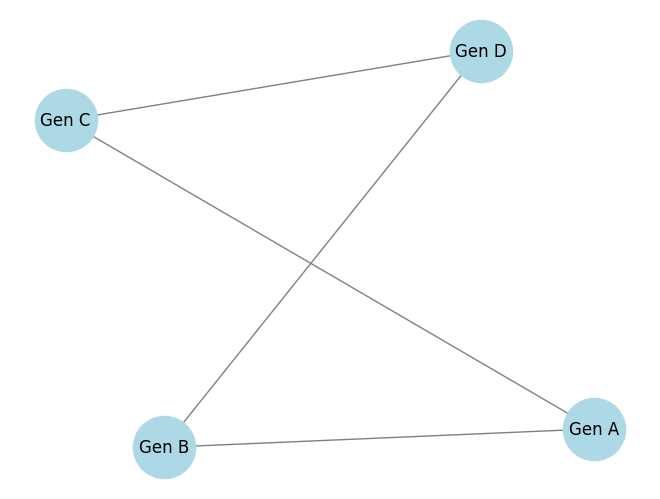

In [26]:
# Mostramos graficamente el grafo
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2000, font_size=12)
plt.show()

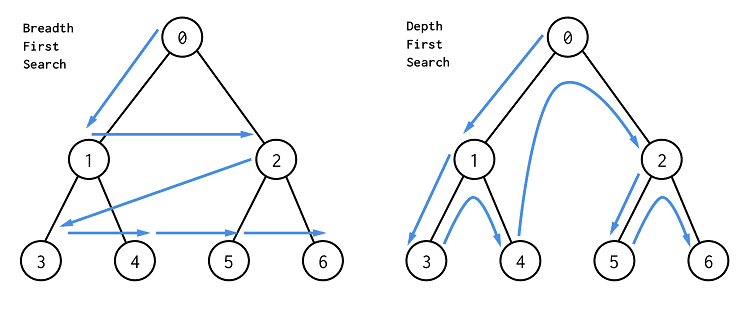

In [27]:
display.Image("img/algo_busqueda.png",  width=700)


#### 3.2 Algoritmo de Dijkstra (Camino más corto)

El **algoritmo de Dijkstra** se utiliza para encontrar el camino más corto entre dos nodos. Este algoritmo es útil cuando se tiene un grafo ponderado y se quiere determinar el camino más eficiente en una red, como por ejemplo, en el análisis de rutas metabólicas o la propagación de enfermedades.

Aplicación:
- Análisis de rutas metabólicas: Encontrar la ruta más corta o eficiente entre dos metabolitos.
- Propagación de enfermedades: Determinar el camino más corto para la transmisión de una enfermedad entre individuos de una red social o de contacto.


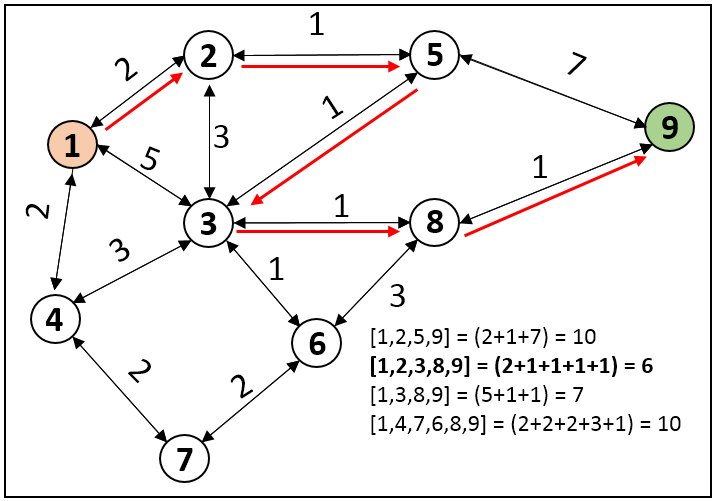

In [28]:
display.Image("img/algo_dijkstra.png",  width=700)

In [29]:
# Creamos un grafo ponderado
# por ejemplo, con pesos como tiempos de reacción
G = nx.Graph()
G.add_weighted_edges_from([("Gen A", "Gen B", 2), ("Gen A", "Gen C", 1),
                           ("Gen B", "Gen D", 1), ("Gen C", "Gen D", 3)])

# Buscamos el camino más corto desde 'Gen A' a 'Gen D'
shortest_path = nx.dijkstra_path(G, source="Gen A", target="Gen D")
print("Camino más corto desde 'Gen A' a 'Gen D':", shortest_path)


Camino más corto desde 'Gen A' a 'Gen D': ['Gen A', 'Gen B', 'Gen D']


<Figure size 600x400 with 0 Axes>

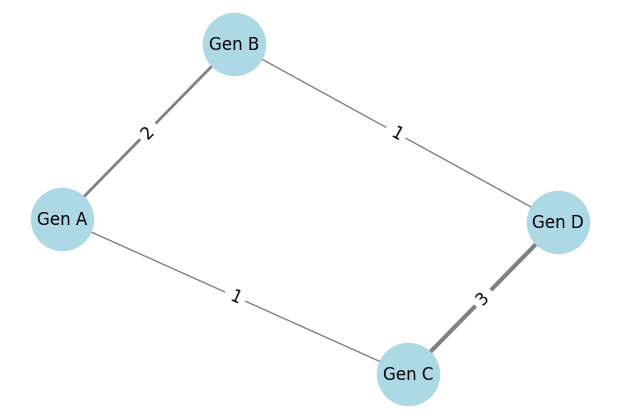

In [30]:
# Dibujamos el grafo
pos = nx.spring_layout(G)  # Posiciones de los nodos
plt.figure(figsize=(6, 4))

# Obtenemos los pesos de las aristas
weights = nx.get_edge_attributes(G, "weight")

# Dibujamos el grafo con grosor basado en los pesos
plt.figure(figsize=(6, 4))
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2000, font_size=12,
        width=[weights[e] for e in G.edges()])  # Ajusta el grosor de las aristas

# Añadimos etiquetas de los pesos en las aristas
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights, font_size=12)

plt.show()

#### 3.3 Algoritmo de centralidad

Las **métricas de centralidad** se usan para identificar los nodos más importantes dentro de un grafo. En el ámbito biomédico, estos nodos son cruciales para identificar genes clave o proteínas críticas.

- Centralidad de intermediación (Betweenness): Mide cuántas veces un nodo actúa como intermediario en los caminos más cortos entre otros dos nodos. Es útil para identificar genes o proteínas clave en una red de interacciones.

- Centralidad de cercanía (Closeness): Mide qué tan cerca está un nodo de todos los demás en el grafo, lo que puede indicar la importancia de un gen o proteína en términos de accesibilidad.

- Centralidad de grado: Mide el número de conexiones directas de un nodo, lo que puede ser útil para identificar genes altamente conectados.

Aplicaciones:
- Identificación de genes y proteínas clave: Usar la centralidad de intermediación para identificar genes que son puntos clave en una red de interacción de proteínas.
- Redes de interacción de proteínas: Descubrir proteínas críticas para posibles tratamientos.

In [31]:
# Creamos un grafo de interacción de proteínas
G = nx.Graph()
G.add_edges_from([("Proteína A", "Proteína B"),
                  ("Proteína A", "Proteína C"),
                  ("Proteína B", "Proteína C"),
                  ("Proteína A", "Proteína D")])

# Calculamos las medidas de centralidad
betweenness_centrality = nx.betweenness_centrality(G)
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

print("Centralidad de intermediación:", betweenness_centrality)
print("Centralidad de grado:", degree_centrality)
print("Centralidad de cercanía:", closeness_centrality)


Centralidad de intermediación: {'Proteína A': 0.6666666666666666, 'Proteína B': 0.0, 'Proteína C': 0.0, 'Proteína D': 0.0}
Centralidad de grado: {'Proteína A': 1.0, 'Proteína B': 0.6666666666666666, 'Proteína C': 0.6666666666666666, 'Proteína D': 0.3333333333333333}
Centralidad de cercanía: {'Proteína A': 1.0, 'Proteína B': 0.75, 'Proteína C': 0.75, 'Proteína D': 0.6}


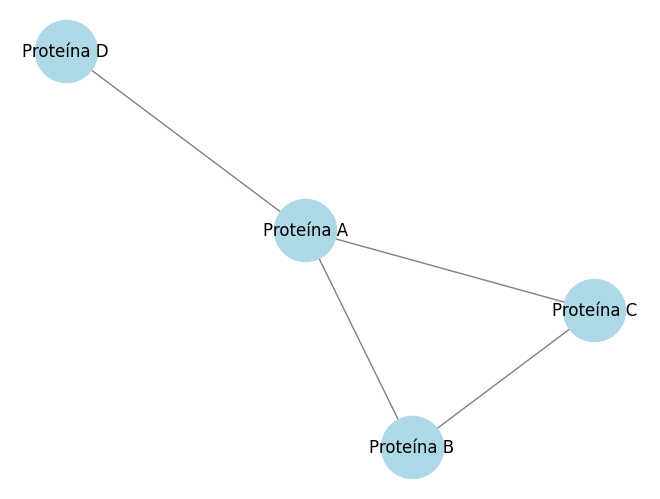

In [32]:
# Mostramos graficamente el grafo
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2000, font_size=12)
plt.show()

#### 3.4 Detección de comunidades

Los **algoritmos de detección de comunidades** (clustering) agrupan nodos que están más interconectados entre sí que con los demás. Este tipo de algoritmos es muy útil para identificar grupos de genes o proteínas que trabajan juntos en el mismo proceso biológico o metabólico.

Aplicaciones:
- Redes de interacción de proteínas (PPI): Encontrar comunidades de proteínas que interactúan fuertemente, lo que podría indicar una vía metabólica o una función biológica compartida.
- Redes de genes: Identificar grupos de genes que están regulados de manera similar o que funcionan en la misma vía metabólica.

In [33]:
#!pip install python-louvain

Comunidades detectadas: {'A': 1, 'B': 1, 'C': 1, 'D': 0, 'E': 0}
Comunidades detectadas:
{'A': 1, 'B': 1, 'C': 1, 'D': 0, 'E': 0}


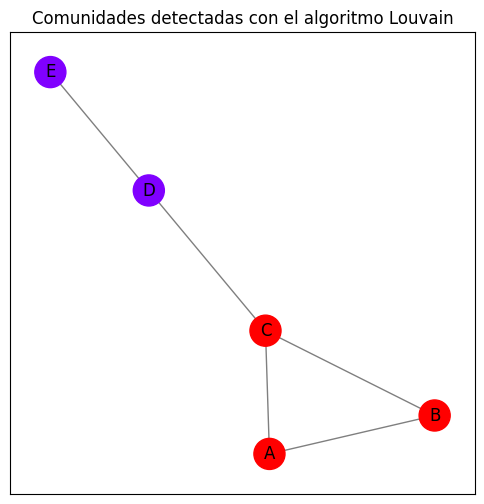

In [34]:
# Cargamos la librería community para detectar comunidades
import community

# Creamos un grafo simple
G = nx.Graph()
G.add_edges_from([("A", "B"), ("A", "C"), ("B", "C"), ("C", "D"), ("D", "E")])

# Detectamos comunidades usando el algoritmo de Louvain
partition = community.best_partition(G)
print("Comunidades detectadas:", partition)

# Mostramos las comunidades
print("Comunidades detectadas:")
print(partition)

# Para visualizar las comunidades
import matplotlib.pyplot as plt
# Cada nodo estará asignado a una comunidad (número)
values = [partition[node] for node in G.nodes()]

# Mostramos el grafo
pos = nx.spring_layout(G)
plt.figure(figsize=(6, 6))
nx.draw_networkx_nodes(G, pos, node_color=values,
                       cmap=plt.cm.rainbow, node_size=500)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=12)
plt.title("Comunidades detectadas con el algoritmo Louvain")
plt.show()

### 4. Knowledge graphs <a name="id1"></a>

Los **Knowledge Graphs** (KG) son representaciones estructuradas de información que organizan datos interrelacionados en un formato de grafo, donde los nodos representan entidades (por ejemplo, personas, lugares, conceptos) y los bordes (o aristas) representan relaciones entre esas entidades. Esta manera de representar la información es muy útil para integrar datos dispersos, visualizar relaciones complejas y proporcionar un enfoque semántico para la consulta de información.

#### 4. 1. **Estructura y componentes de un Knowledge Graph**

Un **Knowledge graph** generalmente consta de los siguientes componentes:

- **Nodos**: Representan entidades o conceptos. En el contexto biomédico, estos pueden ser genes, proteínas, enfermedades, fármacos, etc.
- **Relaciones (Aristas)**: Describen cómo los nodos están conectados. Las relaciones pueden ser de diferentes tipos, como "es un", "está relacionado con", "causa", "es tratamiento de", etc.
- **Atributos**: Información adicional que puede estar asociada a nodos o relaciones. Por ejemplo, un nodo de "gen" puede tener atributos como su nombre, tipo de mutación, etc.
- **Triplas**: Es una forma estándar de representar la información en un KG, en la cual cada relación se expresa como una tripleta (sujeto, predicado, objeto). Por ejemplo: ("Gen X", "causa", "Enfermedad Y").

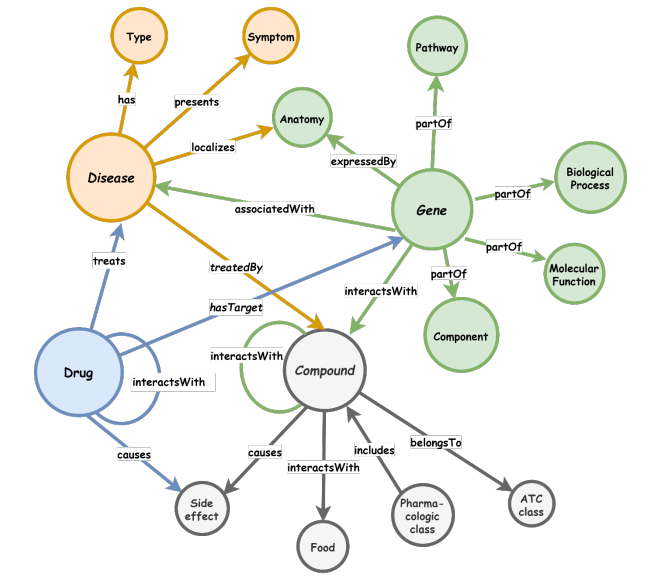

In [35]:
display.Image("img/knowledge_graph.png",  width=700)

Las principales características de los KG son:
   
- **Integración de datos dispersos**: Los KGs pueden integrar múltiples fuentes de datos, lo que facilita la obtención de una vista más completa y coherente sobre el dominio de estudio.
- **Consultas semánticas**: Permiten realizar consultas más avanzadas y semánticas sobre los datos, no solo en términos de valores exactos, sino también en términos de relaciones.
- **Inferencia**: Los KGs permiten la inferencia de nueva información basada en las relaciones existentes entre nodos, lo que ayuda a descubrir nuevos hechos o conexiones.
- **Escalabilidad**: Son altamente escalables y pueden manejar grandes volúmenes de datos, lo que es esencial para dominios como la biomedicina o la salud, donde la cantidad de información es masiva y continua en aumento.

#### 4. 2.  ¿Cómo construir un Knowledge Graph?

   
La construcción de un **Knowledge Graph** implica varios pasos, como:

- **Recolección de datos**: Involucra la obtención de datos de diversas fuentes como bases de datos científicas, literatura biomédica, experimentos de laboratorio, registros clínicos, etc.
- **Extracción de entidades y relaciones**: Utilizando técnicas de procesamiento de lenguaje natural (NLP), minería de texto y algoritmos de extracción de información para identificar las entidades y las relaciones entre ellas.
- **Normalización y alineación**: Los datos provienen de fuentes diversas, por lo que es necesario estandarizar términos, conceptos y relaciones para asegurar la coherencia del grafo.
- **Almacenamiento y gestión**: Los KGs suelen almacenarse en bases de datos orientadas a grafos como **Neo4j**, **Amazon Neptune**, o **GraphDB**, que estan optimizadas para consultas gráficas.



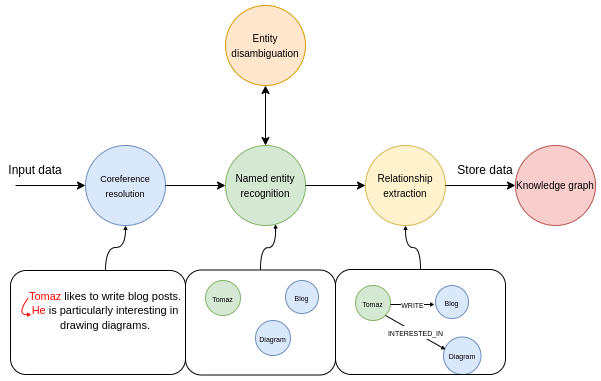

In [36]:
display.Image("img/knowledge_graph_creation.png",  width=700)

Existen varias herramientas y tecnologías que facilitan la construcción, visualización y análisis de **Knowledge Graphs**:

- **Neo4j**: Una base de datos orientada a grafos ampliamente utilizada para crear y consultar KGs. Su lenguaje de consulta **Cypher** es muy intuitivo para trabajar con grafos.
- **GraphDB**: Una base de datos de grafos RDF optimizada para el almacenamiento y la consulta de grandes volúmenes de datos semánticos.
- **TensorFlow** y **PyTorch**: Aunque son librerías para aprendizaje automático, se pueden usar en combinación con KGs para hacer predicciones y análisis avanzados, como la predicción de nuevas interacciones proteína-proteína o la respuesta a tratamientos.

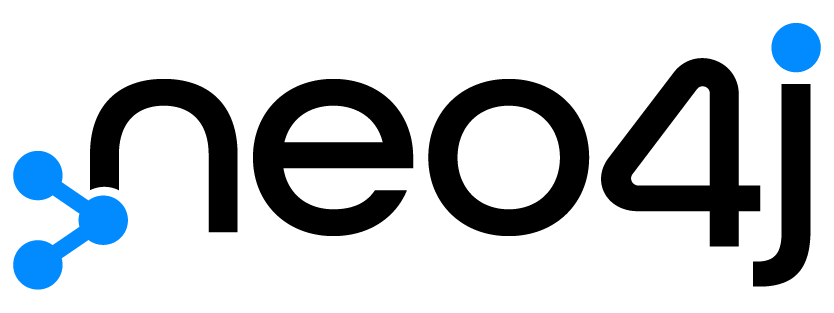

In [37]:
display.Image("img/neo4j.png",  width=200)

#### 4. 3.  **Ventajas de los Knowledge Graphs en la Biomedicina**

Los Knowledge Graphs están transformando la forma en que interactuamos con y analizamos los datos en biomedicina. Ofrecen un marco flexible para organizar, integrar y extraer conocimiento a partir de grandes volúmenes de datos complejos.

Al integrar los conocimientos de diferentes dominios y permitir inferencias automáticas, los KGs están ayudando a acelerar el descubrimiento de nuevas terapias, biomarcadores y estrategias de tratamiento personalizadas.

Algunas ventajas a destacar son:
   
- **Relaciones semánticas explícitas**: Los KGs representan explícitamente las relaciones entre las entidades, lo que facilita la comprensión del contexto completo.
- **Integración de datos heterogéneos**: Permite integrar datos estructurados (como bases de datos relacionales) y no estructurados (como textos científicos).
- **Descubrimiento de nuevas conexiones**: A través de la inferencia, los KGs pueden identificar patrones y relaciones no evidentes que podrían llevar a descubrimientos biomédicos importantes.
- **Mejora de la precisión en la toma de decisiones clínicas**: La integración de datos genéticos, clínicos y farmacológicos en un KG puede mejorar la precisión en la predicción de resultados clínicos o la recomendación de tratamientos.

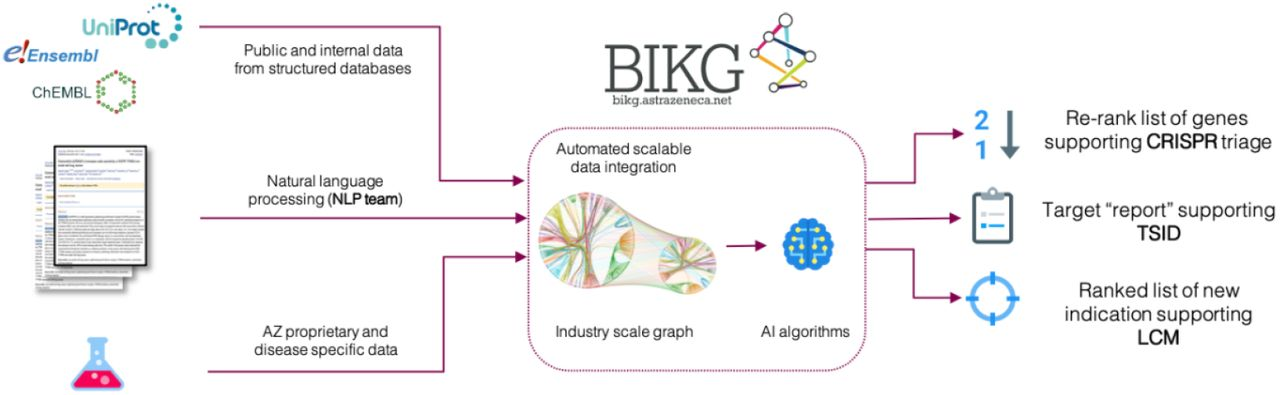

In [38]:
display.Image("img/BIKG.jpg",  width=1000)